# Intro To Applied Neural Networks and CNNs

Steve Pittard wsp@emory.edu (See references inline)

This notebook is based in part on previous notebooks by Shiyu Wang and Yanting Wang who are former TAs and PhDs student in Biostatistics.

## Some Basic Review 

A single-layer neural network, also known as a perceptron or single-layer feedforward network, consists of an input layer and an output layer, with no hidden layers in between. Each neuron in the output layer is directly connected to every input neuron through weighted connections. This type of network is only capable of learning linear relationships between inputs and outputs. 

<img src="./pics/sllmlp.png" width="500" height="400">

Image via https://www.researchgate.net/figure/llustration-of-single-layer-a-and-multilayer-perceptron-b_fig1_367189590

For example, if there exists a straight-line decision boundary between two classes in a classification task, a single-layer network can model it. However, for more complex problems where the decision boundary is non-linear, a single-layer network is insufficient.

A multi-layer neural network, or multi-layer perceptron (MLP), includes one or more hidden layers between the input and output layers. Each layer consists of multiple neurons, and every neuron in a layer is connected to every neuron in the next layer (making it a fully connected or dense network). 

These additional layers and non-linear activation functions (like ReLU, Sigmoid, or Tanh) enable the network to model non-linear relationships and learn complex patterns in the data. The deeper the network (i.e., more hidden layers), the more expressive and powerful it becomes, making it suitable for tasks like image recognition, speech processing, and gene expression analysis.

Both single-layer and multi-layer networks can be fully connected (meaning every neuron in one layer is connected to every neuron in the next layer). However, multi-layer networks generally have a much higher capacity to model complex functions due to their depth and non-linear transformations.

Here are some charactersitics of MLPs:

1) **Fixed Input Size:** Input data must be flattened into a 1D vector.
2) **Good for Structured Data:** MLPs work well for tasks like tabular data, time series forecasting, and simple classification problems.
3) **No Spatial Awareness:** They do not leverage spatial structures in data (e.g., patterns in images).
Limitations of MLPs for Image Processing:

4) **High Computational Cost:** Flattening an image results in a huge number of parameters.
5) **Loss of Spatial Structure:** Treating pixels as independent values loses local spatial relationships.
6) **Inefficient Feature Extraction:** MLPs do not inherently capture patterns like edges, shapes, or textures.

We can actulally play around with Neural Networks courtesy of the Google Tensorflow Playground:

<img src="./pics/tf_playground.png" height="700" width="700">



## Introduction to Convolutional Neural Networks (CNNs)

We'll talk about what CNNs are and how they are different. Convolutional Neural Networks (CNNs) are designed to address these limitations by taking advantage of spatial hierarchies in image data. Instead of using fully connected layers throughout, CNNs use convolutional layers to process local features before passing them to deeper layers.

| Feature                 | MLP (Fully Connected)       | CNN (Convolutional)        |
|-------------------------|---------------------------|----------------------------|
| Layer Type              | Dense (Fully Connected)   | Convolutional + Pooling    |
| Input Representation    | Flattened 1D vector      | Retains 2D/3D structure    |
| Spatial Awareness       | No                        | Yes                        |
| Number of Parameters    | High                      | Lower (shared weights)     |
| Feature Extraction      | Manual                    | Automatic (learned filters)|
| Computational Efficiency| Less efficient            | More efficient for images  |
| Best for               | Structured data, tabular  | Image processing, vision   |

**Convolutional Layers:** Extract local patterns using small filters that slide over the image.
**Pooling Layers:** Reduce dimensionality while preserving important features.
**Shared Weights & Local Receptive Fields:** Instead of a unique weight for each input pixel (as in MLPs), CNNs share weights across different regions, reducing parameter count and improving generalization.


## More Review

Let's revisit some of the concepts discussed in the theoretical lectures as well as the previous lecture which introduced **tensors** and **PyTorch** as it relates to regression problems. The data we looked at was of the tabular variety which is data that looks like an Excel spreadsheet with some number of rows and columns with the columns being considered as "features" of each row.

In reality Neural Networks are particularly well suited to so called "raw" data such as that which might come from images and pictures. We'll also look at an example of that. 

### Fully Connect Feedforward Network (multilayer perceptron, MLP)

#### Framework
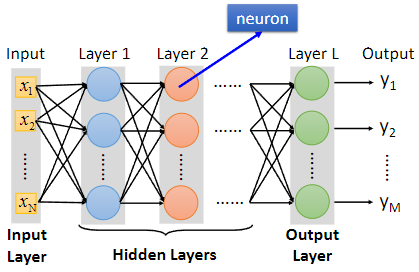
At the t-th layer: 
<p style="text-align: center;">$X^{(t)}=\sigma(X^{(t-1)}W^{(t-1)})$,</p> 
where $X^{(t)}$ is the embedding at the t-th layer, $X^{(t-1)}$ is the embedding at the (t-1)-th layer. $W^{(t-1)}$ is the parameters to be learned at the (t-1)-th layer. 

#### Potential applications

* **Universal approximation theorem**: a feedforward neural network with a single hidden layer can approximate any continuous function to an arbitrary degree of accuracy.
* Prediction task: given data $x$, predict $y$: $y=f(x)$, where $f(x)$ can be approximated by MLP.
* An example: handwriting digit recognition.
![fcnn_exam.PNG](fcnn_exam.PNG)
* Prediction task: given data $x$, predict $y$: $y=f(x)$, where $f(x)$ can be approximated by CNN+MLP.
* An example: handwriting digit recognition.



### Convolutional Neural Network
#### Framework
![CNN](./pics/cnn1.PNG)
![CNN](./pics/cnn2.PNG)

#### Common Architectures

The reality of the situation is that mmany raw data sets are too dense to comfortably accommodate a "fully connected" architecture as that would put a computational strain on the problem. Convolutional layers are designed to implement convolution via a kernel to detect aspects of an image into maps that are then summarized into a prediction. It would be a mistake to assume that the process of convolution will always reduce the data space when in fact the key factors that determine whether convolution reduces, maintains, or expands the feature map size are:

Kernel Size – Larger kernels tend to reduce spatial size.
Stride – Higher stride values reduce size.
Padding – Helps maintain or even expand size.
Dilation – Can expand the receptive field without reducing size.

We could talk at length about what this means from an intellectual point of view but practically speaking you have to make some decisions when considering a convolutional layer in a network. Here is a PyTorch reference to a convolutional layer:

```
conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=0)
```

<img src="./pics/manual_conv2d.png">

It's safe to say that the flow through a CNN will involve one or more convolutional layers followed by fully connected layer to flatten out the predction space so a classification can be made. There could also be one or more activation and dropout layers. So, a CNN, to really be a CNN, has to have at least one convolutional layer.

So it can be common to see 

```
input -> conv1 -> max pool -> conv2 -> max pool -> flatten -> fc1 -> output (a prediction is made)
```

It's helpful here to present a table which summarizes some key concepts we've explored thus far. Part of what makes Deep Learning complicated is understanding how these all relate and can impact each other.

| Term | Definition |
|------|-----------|
| Activation Function | A non-linear function applied to the output of a neuron that introduces non-linearity into the network, enabling it to learn complex relationships in data. |
| Backpropagation | The algorithm used to compute the gradient of the loss function with respect to the weights of the neural network. |
| Batch Normalization | A technique that normalizes the activations within each mini-batch during training, leading to more robust and faster training. |
| Convolutional Neural Network (CNN) | A type of neural network designed to process grid-like data such as images, using convolutional layers to extract local features. |
| Dropout | A regularization technique that randomly sets some neurons to zero during forward passes of the network, improving generalization. |
| Gradient Descent | An optimization algorithm used to find the minimum of a loss function by iteratively updating the parameters along the direction of the negative gradient. |
| Hyperparameter | A parameter whose value is set before the learning process begins (e.g., learning rate, momentum) as distinct from the values of weights learned during training. |
| Learning Rate | A hyperparameter that controls the step size during gradient descent, determining how much the model parameters are updated in each iteration. |
| Loss Function | A function that quantifies the difference between the predicted output of a model and the actual target value. |
| Overfitting | A phenomenon where a model learns the training data too well, leading to poor generalization to unseen data. |
| Parameter Update | The process of modifying the weights of a neural network based on the computed gradient. |
| RMSprop | An adaptive learning rate method that divides the learning rate by a decaying sum of squared gradients, preventing learning rates from approaching zero. |
| Stochastic Gradient Descent (SGD) | An optimization method that computes the gradient on a small random batch of training data. |



## Python packages needed
1. Process data: numpy, pandas, random
2. Construct neural network: pytorch
3. Visualize training performance: matplotlib

## Useful resources
Book: [Dive into Deep Learning](https://d2l.ai/)

## Implementation With Some Examples


### Cross tissue gene expression prediction.
**Background**:

Variations in gene expression have been found to play a crucial role in elevating the risk of complex diseases. However, the expression level of most genes is specific to the tissue type. As a result, the ability to predict gene expression in difficult-to-access target tissues (such as brain and lung) from easily obtainable source tissue is critical and has many practical uses. 

In this study, we aim to predict gene expression level in **lung tissue** (hard to obtain) from the gene expression in **blood tissue**. So we could look at this as a **regression** problem that might well occur in a bioinformatics experiment scenario.


Input:  X matrix (blood gene expressions for each sample)
Target: y matrix (lung gene expressions for each sample)

The goal is for the neural network to learn the relationship between lung and blood gene expression levels, so it can predict the lung expression levels (y) given the blood expression levels (X).


#### Import packages

In [48]:
import random
from torch import nn, optim
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Input dataset and construct model

All data presented here can be downloaded, processed and simulated from the public [GTEx portal](https://www.gtexportal.org/home/datasets). 

Suppose we leverage the expression of 30 genes in whole blood to predict their expression in lung. In our dataset, each row corresponds to a specific gene and each column corresponds to a subject involved in the study. 

<img src="./pics/CTX.png">

Let's get a feel for the data format. It isn't difficult to understand and very much appears to be tabular in nature. Because of this we can use the Python **pandas** module to create two data frames to host the lung and blood data respectively. 

There will be 30 rows in each data set corresponding to 30 unique genes which are common to both data sets - all in the same sequence. The columns represent subject numbers and the values in each row represent some expression data.

In [49]:
# Expression Data relating to Blood and Lunh tissues
expr_blood = pd.read_csv("expr_blood.csv", header=0)
expr_lung = pd.read_csv("expr_lung.csv", header=0)

# Print out the shape of the data frames
print(expr_blood.shape)
print(expr_lung.shape)

# Let's check out the first few rows of the blood data
expr_blood.head()


(30, 419)
(30, 419)


,Unnamed: 0,GTEX.111YS,GTEX.1122O,GTEX.1128S,GTEX.117YW,GTEX.11DXX,GTEX.11DXZ,GTEX.11EI6,GTEX.11EMC,GTEX.11EQ9,...,GTEX.ZPIC,GTEX.ZPU1,GTEX.ZQG8,GTEX.ZT9W,GTEX.ZTPG,GTEX.ZTTD,GTEX.ZUA1,GTEX.ZVT3,GTEX.ZVZQ,GTEX.ZXG5
0,ENSG00000186092,0.0,0.05678,0.00,0.000,0.08923,0.0395,0.000,0.000,0.04013,...,0.00,0.00,0.000,0.07738,0.02864,0.000,0.2332,0.00,0.03527,0.04528
1,ENSG00000268903,181.1,262.10000,311.80,59.000,179.30000,105.2000,105.900,48.020,100.60000,...,383.50,485.70,129.000,203.20000,85.71000,43.760,48.4400,31.63,50.82000,207.40000
2,ENSG00000269981,354.6,373.30000,560.10,136.800,221.40000,126.8000,143.300,94.130,157.00000,...,743.80,561.60,122.700,279.00000,150.80000,73.420,57.1600,43.34,48.22000,249.70000
3,ENSG00000239906,12.2,23.88000,23.37,4.535,11.92000,8.6440,6.956,2.808,6.84300,...,28.45,21.21,5.184,11.11000,4.64000,2.236,2.2090,0.00,2.70700,12.22000
4,ENSG00000248527,518.4,420.50000,663.40,1720.000,483.70000,482.2000,337.500,451.900,165.80000,...,472.70,784.60,377.000,468.20000,367.10000,433.900,736.9000,610.70,887.80000,797.40000


Let's make some changes to the first column which is currently known as "Unnamed: 0" which is not very helpful. Let's change this to "Gene" in both data frames. 


In [3]:
expr_blood.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)
expr_lung.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)

expr_blood.head(2)

,Gene,GTEX.111YS,GTEX.1122O,GTEX.1128S,GTEX.117YW,GTEX.11DXX,GTEX.11DXZ,GTEX.11EI6,GTEX.11EMC,GTEX.11EQ9,...,GTEX.ZPIC,GTEX.ZPU1,GTEX.ZQG8,GTEX.ZT9W,GTEX.ZTPG,GTEX.ZTTD,GTEX.ZUA1,GTEX.ZVT3,GTEX.ZVZQ,GTEX.ZXG5
0,ENSG00000186092,0.0,0.05678,0.0,0.0,0.08923,0.0395,0.0,0.00,0.04013,...,0.0,0.0,0.0,0.07738,0.02864,0.00,0.2332,0.00,0.03527,0.04528
1,ENSG00000268903,181.1,262.10000,311.8,59.0,179.30000,105.2000,105.9,48.02,100.60000,...,383.5,485.7,129.0,203.20000,85.71000,43.76,48.4400,31.63,50.82000,207.40000


So next up, let's find the common gene names in both data frames. They are as follows.

In [4]:
# Step 2: Find common genes
common_genes = set(expr_blood['Gene']).intersection(expr_lung['Gene'])
common_genes

{'ENSG00000078808',
 'ENSG00000107404',
 'ENSG00000127054',
 'ENSG00000131584',
 'ENSG00000131591',
 'ENSG00000160087',
 'ENSG00000162572',
 'ENSG00000162576',
 'ENSG00000169972',
 'ENSG00000176022',
 'ENSG00000186092',
 'ENSG00000186827',
 'ENSG00000186891',
 'ENSG00000187608',
 'ENSG00000187642',
 'ENSG00000187961',
 'ENSG00000188157',
 'ENSG00000188976',
 'ENSG00000224051',
 'ENSG00000225880',
 'ENSG00000228794',
 'ENSG00000230368',
 'ENSG00000230415',
 'ENSG00000231702',
 'ENSG00000239906',
 'ENSG00000240731',
 'ENSG00000248527',
 'ENSG00000268903',
 'ENSG00000269981',
 'ENSG00000272512'}

Let's look at the correlation between the blood and lung tissues. It turns out that they are pretty high which perhaps means that the blood tissue expression levels can be a good predictor of the lung tissue expression levels.

In [5]:
# Example: Compute correlation between blood and lung expression for each sample
correlations = [np.corrcoef(expr_blood[col], expr_lung[col])[0, 1] for col in expr_blood.columns[1:]]

# Display the correlations
print(f"Average correlation between blood and lung: {np.mean(correlations):.2f}")


Average correlation between blood and lung: 0.81


We could look at a histogram of correlative values to get a better sense of the correlations to see where the bin. Note that we have a lot of 1.0 correlations simply because expression values are prefectly correlated with themselves - we can ignore these.

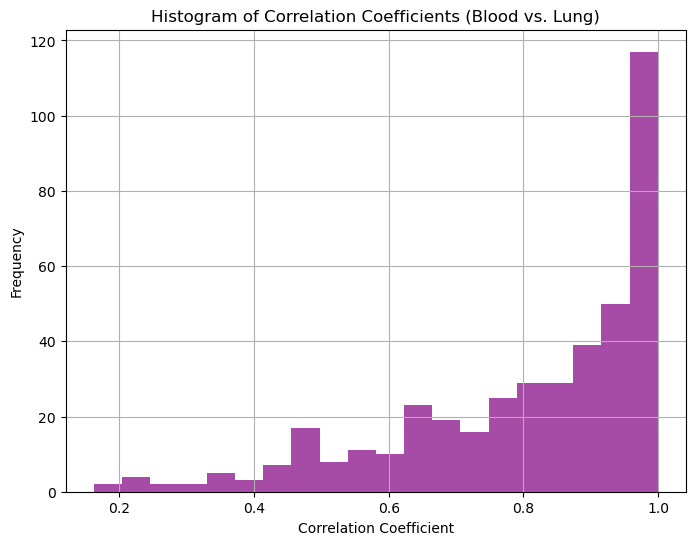

In [6]:
# Compute correlations for each sample
import numpy as np
correlations = [np.corrcoef(expr_blood[col], expr_lung[col])[0, 1] for col in expr_blood.columns[1:]]

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(correlations, bins=20, color='purple', alpha=0.7)
plt.title('Histogram of Correlation Coefficients (Blood vs. Lung)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.grid()
plt.show()



Predicting blood expression levels using lung expression levels with a basic neural network is a plausible approach, especially if there’s a consistent relationship between the two datasets (as indicated by the correlation of ~0.81). A fully connected Multi-Layer Perceptron (MLP) in PyTorch is a suitable choice for this kind of regression task.

Let's visualize the data using some basic approaches. We might not be immediately able to see relationships emerge due to outliers in the data. We might consider some level of scaling or centering to make the relationships more apparent. But let's start to see what can be seen.

#### Visualizing Data

Let's visualize the data using some basic approaches. We might not be immediately able to see relationships emerge due to outliers in the data. We might consider some level of scaling or centering to make the relationships more apparent. But let's start to see what can be seen

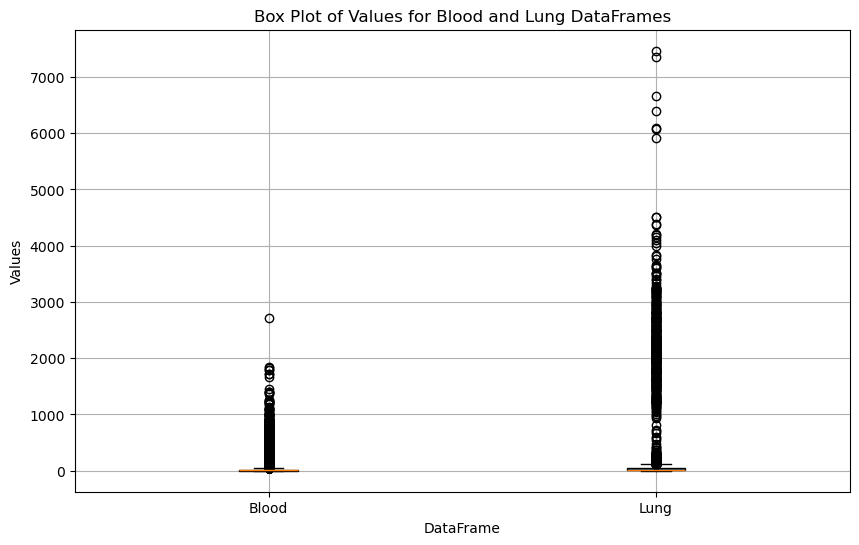

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming expr_blood and expr_lung are already defined
# Exclude the first column which is non-numeric
blood_values = expr_blood.iloc[:, 1:].values.flatten()
lung_values = expr_lung.iloc[:, 1:].values.flatten()

# Combine the data into a list for the box plot
data = [blood_values, lung_values]

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=["Blood", "Lung"], patch_artist=True)

# Add titles and labels
plt.title("Box Plot of Values for Blood and Lung DataFrames")
plt.ylabel("Values")
plt.xlabel("DataFrame")
plt.grid()

# Show the plot
plt.show()


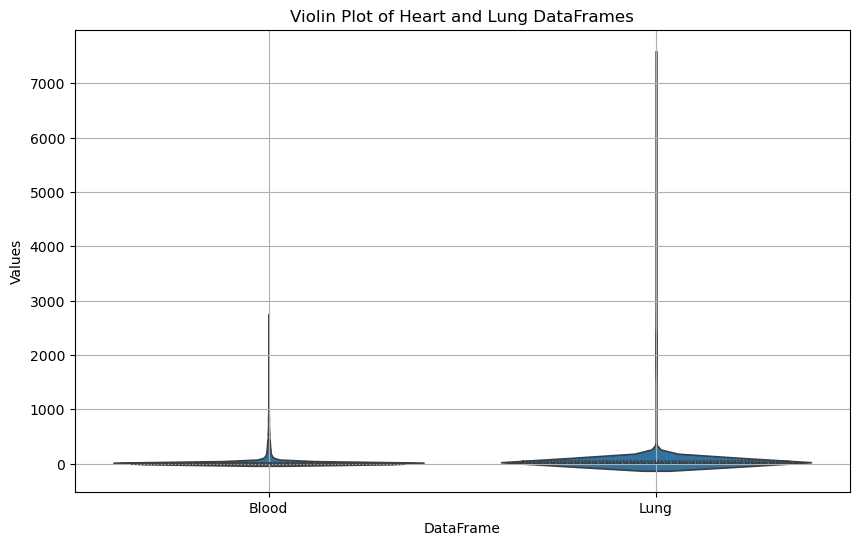

In [8]:
import seaborn as sns

# Prepare data for plotting
import numpy as np
heart_values = expr_blood.iloc[:, 1:].values.flatten()
lung_values = expr_lung.iloc[:, 1:].values.flatten()

data = {
    "Values": np.concatenate([heart_values, lung_values]),
    "Group": ["Blood"] * len(heart_values) + ["Lung"] * len(lung_values)
}
df_plot = pd.DataFrame(data)

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x="Group", y="Values", data=df_plot, inner="quart", density_norm="width")

# Add titles and labels
plt.title("Violin Plot of Heart and Lung DataFrames")
plt.ylabel("Values")
plt.xlabel("DataFrame")

# Show the plot
plt.grid()
plt.show()

Note that we might need to adjust the data somewhat because extreme values might cause problems when performing various numeric operations. This can easily be diagnosed by plotting the data in the form of a box plot or violin plot. We could also print out the Inter Quartle Range of all the data to see where it falls. 

In [9]:
# Compute the Q2 (median), Q1, Q3, and IQR for blood values
q2_blood = np.percentile(blood_values, 50)  # Median (Q2)
q1_blood = np.percentile(blood_values, 25)  # First quartile (Q1)
q3_blood = np.percentile(blood_values, 75)  # Third quartile (Q3)
iqr_blood = q3_blood - q1_blood  # Interquartile range (IQR)

# Compute the Q2 (median), Q1, Q3, and IQR for lung values
q2_lung = np.percentile(lung_values, 50)  # Median (Q2)
q1_lung = np.percentile(lung_values, 25)  # First quartile (Q1)
q3_lung = np.percentile(lung_values, 75)  # Third quartile (Q3)
iqr_lung = q3_lung - q1_lung  # Interquartile range (IQR)

# Print the results
print("Blood DataFrame Summary:")
print(f"Q1: {q1_blood}, Q2 (Median): {q2_blood}, Q3: {q3_blood}, IQR: {iqr_blood}")

print("\nLung DataFrame Summary:")
print(f"Q1: {q1_lung}, Q2 (Median): {q2_lung}, Q3: {q3_lung}, IQR: {iqr_lung}")


Blood DataFrame Summary:
Q1: 0.685975, Q2 (Median): 4.366, Q3: 18.3425, IQR: 17.656525000000002

Lung DataFrame Summary:
Q1: 4.322, Q2 (Median): 16.65, Q3: 49.0175, IQR: 44.695499999999996


What we might find is that it's better to eventually apply some type of data transformation to the data to make it more easily viewable and usable. Common approaches. involve log, square root, and normalization, or scaling. Here lets apply a log transform as an example.

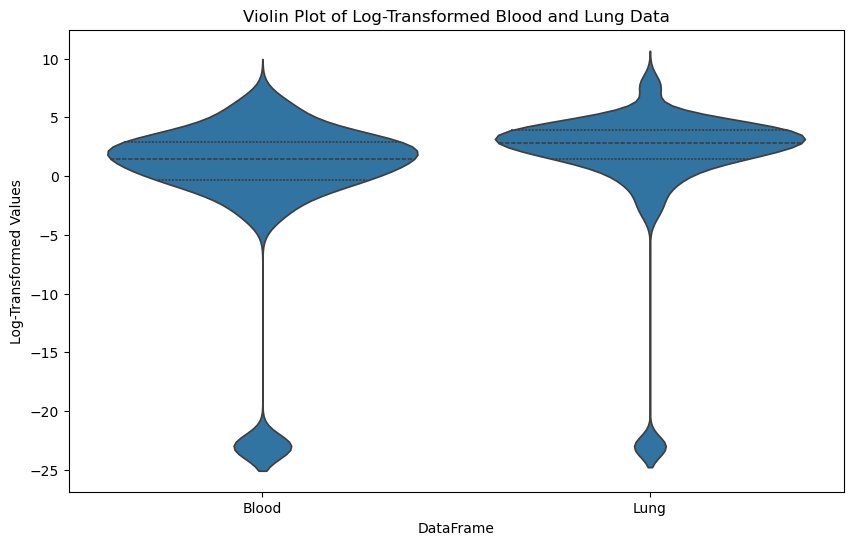

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Log transform the values, adding a small constant to avoid log(0)
epsilon = 1e-10
blood_values_log = np.log(expr_blood.iloc[:, 1:].values.flatten() + epsilon)
lung_values_log = np.log(expr_lung.iloc[:, 1:].values.flatten() + epsilon)

# Prepare data for plotting
data_log = {
    "Values": np.concatenate([blood_values_log, lung_values_log]),
    "Group": ["Blood"] * len(blood_values_log) + ["Lung"] * len(lung_values_log)
}
df_plot_log = pd.DataFrame(data_log)

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x="Group", y="Values", data=df_plot_log, inner="quart", density_norm="width")

# Add titles and labels
plt.title("Violin Plot of Log-Transformed Blood and Lung Data")
plt.ylabel("Log-Transformed Values")
plt.xlabel("DataFrame")

# Show the plot
plt.show()



#### Setting up a Multi Layer Perceptron to Do Regresssion

So next we want to consider the **blood** dataset numeric values as being a set of predictors for the expression values in the **lung** dataset. This isn't hard to setup and is largely an issue of avoiding the first column which is named **Gene** with the associated values being one of the 30 unique gene names we identified above. So let's get started. 

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Assuming expr_blood and expr_lung are DataFrames which they definitely are
X = expr_blood.iloc[:, 1:].values  # Exclude gene names
y = expr_lung.iloc[:, 1:].values

# Get some information
print(type(X))
print(X.dtype)
print(X.round(3))

<class 'numpy.ndarray'>
float64
[[0.000e+00 5.700e-02 0.000e+00 ... 0.000e+00 3.500e-02 4.500e-02]
 [1.811e+02 2.621e+02 3.118e+02 ... 3.163e+01 5.082e+01 2.074e+02]
 [3.546e+02 3.733e+02 5.601e+02 ... 4.334e+01 4.822e+01 2.497e+02]
 ...
 [1.829e+01 2.559e+01 1.181e+01 ... 7.701e+00 8.500e+00 1.049e+01]
 [8.640e+00 8.077e+00 1.789e+01 ... 1.176e+01 1.523e+01 2.132e+01]
 [2.920e-01 9.790e-01 1.035e+00 ... 1.531e+00 1.793e+00 9.420e-01]]


Remember that we wish to predict **"y"** using **"X"**. We also want to train out model on a subset of the data, in this case about 80% of the data which will be 0.80 * 30 = 24 rows of data. And then we will set up some indexing code so we can convenietly access 24 rows at random. After we train the mode or AS we train it, we can look at performance using the **test** data. But we are getting ahead of ourselves.

In [12]:
# Manual train-test split (80-20 split)
n_samples = X.shape[0]
train_size = int(0.8 * n_samples)

# Shuffle the indices for randomness
indices = np.arange(n_samples)
np.random.seed(42)  # For reproducibility
np.random.shuffle(indices)

# Split the data
train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

# Directly use shape values in the print statement
print(f"In X_train there are {X_train.shape[0]} rows and {X_train.shape[1]} columns.")
print(f"In X_test there are {X_test.shape[0]} rows and {X_test.shape[1]} columns.")

In X_train there are 24 rows and 418 columns.
In X_test there are 6 rows and 418 columns.


#### Scaling 

So predicting lung expression levels using blood expression levels (y ~ X) with a basic neural network is a plausible approach, especially if there’s a consistent relationship between the two datasets (as indicated by the correlation of ~0.81). A fully connected Multi-Layer Perceptron (MLP) in PyTorch is a suitable choice for this kind of regression task.

For your general information Neural networks work better when input data is standardized to have zero mean and unit variance. It improves convergence and helps the model avoid numerical instability.

So here we will normalize the data. As mentioned scaling data helps MLPs learn faster, converge efficiently, and perform better by ensuring all features contribute equally and are in the optimal range for activation functions.

Benefits of Scaling Data for MLPs:

**Faster Convergence:**
Scaling ensures more uniform gradient updates, which speeds up the convergence process during training, especially when using gradient-based optimization methods like stochastic gradient descent.

**Better Activation Function Performance:**
Activation functions like Sigmoid, Tanh, and ReLU work better when inputs are scaled. Unscaled inputs can cause saturation, leading to vanishing gradients or inactive neurons.

**Equal Contribution of Features:**
Scaling ensures that features with different ranges (e.g., age vs. income) contribute equally to the model’s learning, preventing dominance by larger-magnitude features.

**Avoiding Exploding/Vanishing Gradients:**
Proper scaling keeps gradients within a stable range, preventing both exploding and vanishing gradients during training.

**Improved Weight Initialization:**
Scaling helps maintain the assumptions of initialization methods (e.g., Xavier or He initialization), leading to better weight starting points and more stable training.

**Consistent Data Behavior:**
Scaling ensures all features are interpreted on a consistent scale, making it easier for the model to learn relationships in the data.

**Common Scaling Techniques:**
Min-Max Scaling: Rescales data to a fixed range, usually [0, 1].
Standardization: Scales data to have a mean of 0 and standard deviation of 1.



In [13]:
# Normalize data (mean and std per feature for standardization)
X_mean, X_std = X_train.mean(axis=0), X_train.std(axis=0)
y_mean, y_std = y_train.mean(axis=0), y_train.std(axis=0)

X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std
y_train = (y_train - y_mean) / y_std
y_test = (y_test - y_mean) / y_std

print(X_train.dtype)
print(X_train)

float64
[[-0.2796777  -0.2484797  -0.3759008  ... -0.2783568  -0.25869568
  -0.3328367 ]
 [-0.4075907  -0.45240584 -0.41335242 ... -0.30664062 -0.2664346
  -0.36507508]
 [-0.29935414 -0.30957505 -0.25864085 ... -0.23378057 -0.15444311
  -0.1976513 ]
 ...
 [-0.40698589 -0.4313447  -0.41109609 ... -0.32326451 -0.2959271
  -0.34805263]
 [ 0.25537635  0.31899386  0.02498742 ...  0.12911084  0.07995369
   0.20869297]
 [-0.42481726 -0.45995897 -0.43807973 ... -0.32948811 -0.29703021
  -0.39071666]]


**The Role of Tensors**

We'll also convert our Training and Testing data into tensors. Tensors are a fundamental data structure in deep learning, especially when using Multi-Layer Perceptrons (MLPs). They generalize matrices to higher dimensions and allow efficient representation of data, which is essential for working with multiple layers and high-dimensional inputs. 

By organizing data in tensors, operations like matrix multiplication, element-wise operations, and transformations can be performed in parallel, making computations much faster. This is crucial when training MLPs, where large amounts of data need to be processed through many layers.

Furthermore, tensors enable more flexible and efficient memory management. Since MLPs require processing of data through multiple layers and a significant number of neurons, using tensors allows the model to handle inputs, weights, and activations in a consistent and scalable way. 

With tensor-based libraries like TensorFlow or PyTorch, the operations on tensors are optimized for both CPU and GPU architectures, ensuring that models can scale to large datasets and complex architectures without running into memory bottlenecks.

The data we have here is not very large so we don't necessarily need to run on GPUS but if the data was in fact large then having it in the form of tensors would be a first step towards efficient processing.

In [14]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

print(X_train_tensor.dtype)
print(X_train_tensor)


torch.float32
tensor([[-0.2797, -0.2485, -0.3759,  ..., -0.2784, -0.2587, -0.3328],
        [-0.4076, -0.4524, -0.4134,  ..., -0.3066, -0.2664, -0.3651],
        [-0.2994, -0.3096, -0.2586,  ..., -0.2338, -0.1544, -0.1977],
        ...,
        [-0.4070, -0.4313, -0.4111,  ..., -0.3233, -0.2959, -0.3481],
        [ 0.2554,  0.3190,  0.0250,  ...,  0.1291,  0.0800,  0.2087],
        [-0.4248, -0.4600, -0.4381,  ..., -0.3295, -0.2970, -0.3907]])


**Defining The MLP**

So we need to actually define the MLP. We did some of this last week using PyTorch. So let's define a class that layouts of the architecture. The possibilites for architecture are endless but we will adopt a pretty basic approach with which we can experiment. Note that even though this is a small architecture it is still pretty effective. I also want to make it clear that this is MLP / Fully Connected Network - we aren't yet to the stage of it being a Convolutional Neural Network. I did, however, want to show you how to create a MLP in PyTorch as a **warmup** to a CNN. I'll provide you will a summary of the differences between the MLP and the CNN because they will come in handy later. 

| Feature                 | MLP (Your Architecture) | CNN (Convolutional Neural Network) |
|-------------------------|------------------------|-------------------------------------|
| **Layer Type**         | Fully Connected (FC)   | Convolutional & Pooling Layers     |
| **Uses `nn.Linear()`?** | ✅ Yes                 | ❌ No                              |
| **Uses `nn.Conv2d()`?** | ❌ No                  | ✅ Yes                             |
| **Processes Spatial Data?** | ❌ No (1D feature vectors) | ✅ Yes (2D/3D data like images) |
| **Uses Pooling (`MaxPool2d`)?** | ❌ No | ✅ Yes (to downsample feature maps) |
| **Dropout Layers?**     | ✅ Yes (for regularization) | ✅ Yes (but less common than in MLPs) |
| **Activation Function** | ✅ ReLU (`nn.ReLU()`) | ✅ ReLU (`nn.ReLU()`), others like LeakyReLU |
| **Flattening Required?** | ❌ No (input is already flat) | ✅ Yes (to convert feature maps before FC layer) |
| **Best For**            | Tabular Data, Regression, Classification on structured data | Image Processing, Feature Extraction from spatial data |


In [55]:
class MLPRegressor(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLPRegressor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 32),  # First layer with input_dim -> 64 units
            nn.ReLU(),                 # ReLU activation function - RelUs do NOT IMPACT Spatial Dimension
            nn.Dropout(0.2),           # Dropout to prevent overfitting
            nn.Linear(32, 16),         # Second layer with 64 -> 32 units
            nn.ReLU(),                 # ReLU activation function
            nn.Dropout(0.3),           # Another Dropout layer
            nn.Linear(16, output_dim)  # Final layer with 32 -> output_dim units
        )
    
    def forward(self, x):
        return self.model(x)

input_dim = X_train_tensor.shape[1]
output_dim = y_train_tensor.shape[1]

# Create an instance of the MLP Regressor - This doesn
# train it. It just initializes the model
model = MLPRegressor(input_dim, output_dim)

Let's print out the model parameters. Note the following in the model:

1) The input layer takes input_dim features.
2) The first hidden layer has 64 neurons (nn.Linear(input_dim, 64)).
3) The second hidden layer has 32 neurons (nn.Linear(64, 32)).

The output layer has output_dim neurons (nn.Linear(32, output_dim)).

In [56]:
print(model.parameters)

<bound method Module.parameters of MLPRegressor(
  (model): Sequential(
    (0): Linear(in_features=418, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=32, out_features=16, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=16, out_features=418, bias=True)
  )
)>


In [57]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
#optimizer = optim.SGD(model.parameters(), lr=0.01)  # Initial learning rate


# Initialize lists to store the losses
train_losses = []
test_losses = []

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    
    # Training step
    optimizer.zero_grad()
    predictions_train = model(X_train_tensor)
    loss_train = criterion(predictions_train, y_train_tensor)
    loss_train.backward()
    optimizer.step()

    # Evaluate on test data
    model.eval()
    with torch.no_grad():
        predictions_test = model(X_test_tensor)
        loss_test = criterion(predictions_test, y_test_tensor)
    
    # Store losses for plotting
    train_losses.append(loss_train.item())
    test_losses.append(loss_test.item())
    
    # Print the loss for every epoch
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

# Final evaluation on test data
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor)
    test_loss = criterion(test_predictions, y_test_tensor)
    print(f"Final Test Loss: {test_loss.item():.4f}")

Epoch 5/100, Training Loss: 1.0179, Test Loss: 0.0945
Epoch 10/100, Training Loss: 1.0137, Test Loss: 0.0915
Epoch 15/100, Training Loss: 1.0051, Test Loss: 0.0903
Epoch 20/100, Training Loss: 0.9616, Test Loss: 0.0887
Epoch 25/100, Training Loss: 1.0017, Test Loss: 0.0869
Epoch 30/100, Training Loss: 0.9626, Test Loss: 0.0854
Epoch 35/100, Training Loss: 0.8907, Test Loss: 0.0840
Epoch 40/100, Training Loss: 0.8309, Test Loss: 0.0811
Epoch 45/100, Training Loss: 0.7962, Test Loss: 0.0778
Epoch 50/100, Training Loss: 0.7831, Test Loss: 0.0750
Epoch 55/100, Training Loss: 0.7005, Test Loss: 0.0720
Epoch 60/100, Training Loss: 0.6261, Test Loss: 0.0692
Epoch 65/100, Training Loss: 0.5580, Test Loss: 0.0642
Epoch 70/100, Training Loss: 0.4878, Test Loss: 0.0604
Epoch 75/100, Training Loss: 0.5121, Test Loss: 0.0574
Epoch 80/100, Training Loss: 0.6866, Test Loss: 0.0535
Epoch 85/100, Training Loss: 0.3802, Test Loss: 0.0487
Epoch 90/100, Training Loss: 0.4108, Test Loss: 0.0449
Epoch 95/10

It's always best to visualize the training process and resulting losses both for training and testing. In this case the model is well fit (maybe too well) to the data so testing loss is quite minimal. 

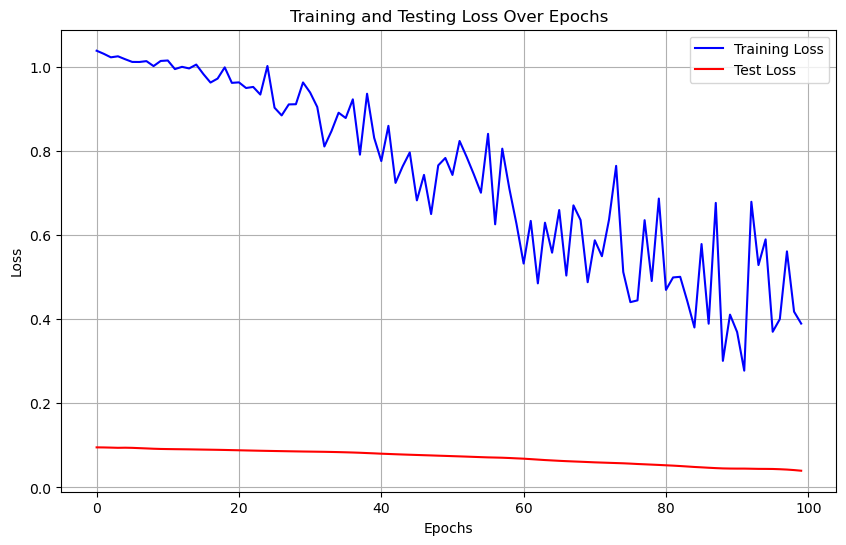

In [58]:
# Plotting the training and testing losses
plt.figure(figsize=(10, 6))
#plt.plot(range(epochs), train_losses, label='Training Loss', color='b', linestyle='-', marker='o')
#plt.plot(range(epochs), test_losses, label='Test Loss', color='r', linestyle='--', marker='x')
plt.plot(range(epochs), train_losses, label='Training Loss', color='b')
plt.plot(range(epochs), test_losses, label='Test Loss', color='r')
plt.title('Training and Testing Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

You can, if you wish, save the model to a local file for later use or sharing with others. There are better ways to share or make the model available for production but for basic collaboraion and later reuse, it's easy to do it this way.

In [59]:
torch.save({'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                }, "bios534.pt")

Now if you wanted to reload this at some point for inference you could do the following.

In [60]:
saved_model = MLPRegressor(input_dim, output_dim)
saved_model.load_state_dict(torch.load("bios534.pt",weights_only=True)['model_state_dict'])
saved_model.eval()

MLPRegressor(
  (model): Sequential(
    (0): Linear(in_features=418, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=32, out_features=16, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=16, out_features=418, bias=True)
  )
)

We could do some inference using the saved model on our data. Or, if we had new data we could do inference on that.

In [61]:
with torch.no_grad():
    test_predictions = saved_model(X_test_tensor)
    test_loss = criterion(test_predictions, y_test_tensor)
    print(f"Final Test Loss: {test_loss.item():.4f}")

Final Test Loss: 0.0398


### 2. Convolutional Networks Using the MNIST Dataset

As we now know Convolutional Neural Networks (CNNs) are a class of deep learning models designed for processing structured grid-like data, such as images. Unlike fully connected networks, CNNs leverage spatial hierarchies by applying convolutional layers that learn local patterns and features.

At a high level, CNNs consist of:

| Component               | Description |
|-------------------------|------------|
| **Convolutional Layers** | Extract features from the input using small filters (kernels). |
| **Activation Functions (e.g., ReLU)** | Introduce non-linearity, allowing the network to learn complex patterns. |
| **Pooling Layers** | Reduce spatial dimensions while preserving important features, improving computational efficiency. |
| **Fully Connected Layers** | Integrate extracted features to make final predictions. |

Role of Kernels (Filters)
Kernels (or filters) are small matrices that slide over the input image, performing element-wise multiplication and summation (convolution operation). They detect key patterns such as edges, textures, and shapes in early layers and increasingly complex features in deeper layers. By stacking multiple convolutional layers, CNNs develop hierarchical feature representations, making them highly effective for tasks like image classification and object detection.

This structured approach enables CNNs to generalize well to new images while reducing the number of parameters compared to traditional fully connected networks. So with reference to the following picture of a cat's face, we can use a 2x2 kernel to "walk" across the photo to detect parts of the image which we can later use to make a prediction as to whether the picture is actually representative of an actual cat's face.

<img src="./pics/cat_convolve.png" width=500 height=500>


### The MNIST Data Set
**Background**

Let's look at the MNIST Dataset / Database 

> The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.[4][5] 

From Wikipedia: 

> The MNIST database contains 60,000 training images and 10,000 testing images.[8] Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset

The images in MNIST are of size 1x28x28, i.e. 1-channel grayscale of 28x28 pixels in size. 

<img src="./pics/mnist.png" width="500" height="400">

Let's tak a closer look at how one of the images looks on a grid. For purposes of detection we would generally put the digit on a white background which is 784 pixels. Each pixel has a value of 0 to 255 which indicates the measure of light to darkness respectively. 


<img src="./pics/convolve.png" >

The above image is a screen shot of the Deep Lizard Convolution animator available at https://deeplizard.com/resource/pavq7noze2

**Purpose of Convolutional Layers in CNNs:**

CNNs are not the same as Fully Connected Networks.

It's important to understand that Convolutional networks are not fully connected primarily because they are designed to work with raw data—such as images or multi-channel data—where the input is often large, spatially structured, and potentially high-dimensional. Using a fully connected architecture for such data would lead to very dense and computationally expensive networks, which would be inefficient and impractical.

In a fully connected network, each neuron in one layer is connected to every neuron in the next layer, leading to a large number of parameters. For example, in the case of images, the input size could be huge for an RGB image), and if you were to connect every pixel to every neuron in the subsequent layers, the number of connections would grow exponentially, making the model slow to train and prone to overfitting.


**IMPORTANT:** CNNs work hand-in-hand with **kernels**. They "help" CNNs do their work by a process of **convolution**! Kernels (or filters) in CNNs are small matrices (e.g., 3×3 or 5×5) that slide over an image, detecting patterns like edges, textures, and shapes. Each kernel performs a convolution operation, where it multiplies pixel values by its weights and sums the result, producing a feature map that highlights specific patterns in the image.

A CNN typically uses multiple kernels in each convolutional layer, with early layers detecting simple features (edges, corners) and deeper layers capturing complex patterns (shapes, objects). This allows CNNs to recognize visual patterns efficiently while reducing the number of parameters compared to fully connected networks.

Here is an overview or what happens with CNNs and how they are different from Fully Connected Networks.

**Feature Extraction:**
Convolutional layers apply small filters (kernels) to the input image to automatically detect simple features (e.g., edges, textures). Each filter produces a feature map that highlights where certain features are found.

**Local Connectivity:**
Unlike fully connected layers, convolutional layers focus on small, local regions of the image, helping the model learn spatial patterns (e.g., edges, shapes) that are important for image analysis.

**Parameter Sharing:**
The same filter is applied across different parts of the image, reducing the number of parameters and improving efficiency.

**Translation Invariance:**
The sliding window approach allows CNNs to recognize features anywhere in the image, making them robust to changes in position or orientation of objects.

**Hierarchical Feature Learning:**
Deeper convolutional layers combine simple features (edges) into more complex ones (textures, objects), allowing the model to build up more abstract representations.

Convolutional layers help the model automatically learn relevant features from images, reducing the need for manual feature engineering. They also help with translation invariance, making them powerful for image recognition tasks.


#### The MNIST Dataset

**Load The Data**

The good news for you us that the dataset is part of the **torchvision** data set which makes it convenient to download. The data is in **PIL** format which is **Python Imaging Library** format - a library for opening, manipulating, and saving images in Python. As an aside if you type the following (assuming you have imported torchvision correctly) and press the **tab** key which will show you all the datasets provided by the **torchvision.datasets** module. Of course you can always go to the documentation page for it.

```
torchvision.datasets.
```

You will see the following panel:

<img src="./pics/mnist_objects.png" height="300" width="300">

As it relates to the MNIST data - the dataset initially consists of PIL images before transformations are applied. PIL images are:

- 2D grayscale images (for MNIST)
- Stored as PIL.Image objects
- Have a shape of (Height, Width), e.g., (28, 28)

There is an implied **channel** dimension of "1" given that the images are in grayscale. So think of the image dimensions
of being in the format **(Height, Width, Channel)**. To use **tensors** to help create a neural network the resulting tensor representation of any image will need to be **(Channel, Height, Width)**. As a quick example check out the following code which attempts to work just with the PIL format. 

Image type: <class 'PIL.Image.Image'>
Image size (H, W): (28, 28)
Label: 5


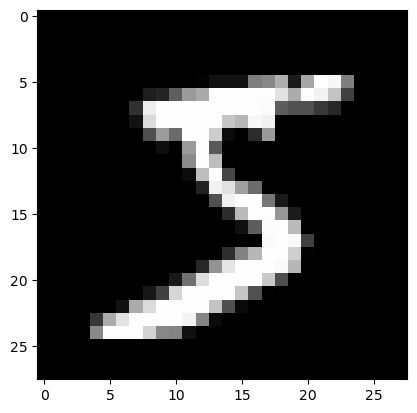

In [62]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

# Load MNIST dataset without transformation (raw PIL images)
mnist_dataset = MNIST(root="./data", train=True, transform=None, download=True)

# Get the first image and label
image, label = mnist_dataset[0]

# Print the shape of the image (PIL object)
print(f"Image type: {type(image)}")  # Should print <class 'PIL.Image.Image'>
print(f"Image size (H, W): {image.size}")  # Should print (28, 28)
print(f"Label: {label}")

# Convert the PIL image to a NumPy array for visualization
image_np = torch.ByteTensor(torch.ByteStorage.from_buffer(image.tobytes())).reshape(image.size[1], image.size[0]).numpy()

# Plot the image
plt.imshow(image_np, cmap="gray")
plt.show()

To help us we can use the **transforms** method to make simple work of turning this data into a tensor. We could do this ourselves and in a real world situation we with new data we would probably have to do that. But the **ToTensor** method has a number of conveniences so we should use it whenever possible. For example, we might also want to normalize values so each image is roughly comparable.

When training models, it's common practice to normalize inputs with the statistics of the training set rather than dynamically computing them on a per-run basis. This ensures that test and validation images are normalized in the same way as the training data.

If you wanted to - you could compute the mean and standard deviation using some basic Python code. If we were using a non-standard data set or a new data set we would take this approach. It's just that the MNIST data set is so famous we already know the numbers in advance. 

Here we don't apply any transforms when reading the data. 

Tensor shape: torch.Size([1, 28, 28])
Label: 5


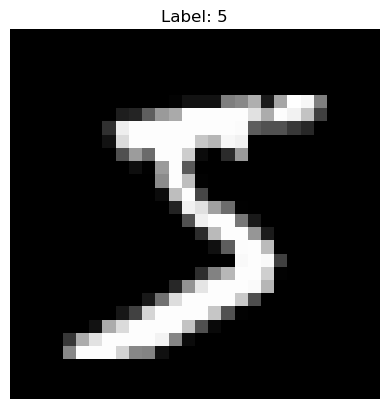

In [63]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    # Normalize with mean & std
    transforms.Normalize((0.5,), (0.5,))  
])

# Load MNIST dataset (only one sample for illustration)
mnist_dataset = MNIST(root="./data", train=True, transform=transform, download=True)

# Get the first image and label
image, label = mnist_dataset[0]  

# Print tensor shape
print(f"Tensor shape: {image.shape}") 
print(f"Label: {label}")

# Convert tensor back to a NumPy array for visualization
# Remove channel dimension for display
image_np = image.squeeze().numpy()  

# Plot the image
plt.imshow(image_np, cmap="gray")
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()


Now that we have benefitted from the miracles of the **ToTensor** method we can create a training and testing dataset which is made easier by the **MNIST** function which supports the identification of the built-in Training and Testing sets for MNIST. Again, this is only because the MNIST is part of the **torchvision** data sets. 

In [64]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Download and load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset  = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)


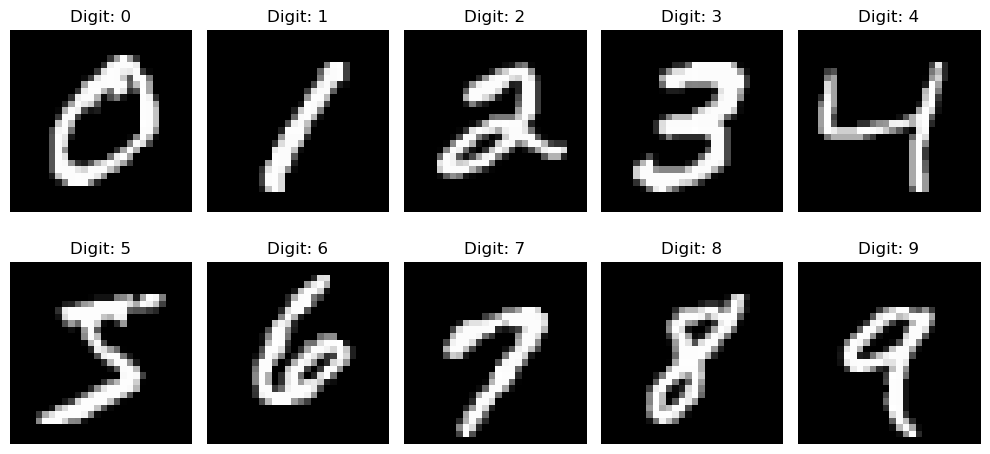

In [65]:
# Plot the data

# Dictionary to store one example per digit (0-9)
digit_examples = {}

# Loop through dataset to find one example per digit
for image, label in train_dataset:
    if label not in digit_examples:  # Store only one example per digit
        digit_examples[label] = image
    if len(digit_examples) == 10:  # Stop when we have all 10 digits
        break

# Plot images 0–9
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, (digit, img) in enumerate(sorted(digit_examples.items())):
    ax = axes[i // 5, i % 5]
    ax.imshow(img.squeeze(), cmap="gray")  # Remove channel dim & show in grayscale
    ax.set_title(f"Digit: {digit}")
    ax.axis("off")

plt.tight_layout()
plt.show()

#### Using Data Loaders

Since we have a large number of datasets we'll use someting called **DataLoader** which is a PyTorch utility to helps load and manage datasets efficiently during training and evaluation. 

It provides batching, shuffling, and multi-threaded data loading, making it easier to work with large datasets. When working with datasets in PyTorch, you typically can load a dataset (e.g., torchvision.datasets.MNIST). 

Technically DataLoader is not required but since it's part of PyTorch there is no reason not to use it. The only problem is that **DataLoader** turns the data into a series of batches which in this case are 64 images per batch. So we have to use methods specific to **DataLoader** objects to **get at** the data. That's not really a problem just that it might not be immediately obvious to you. 

In [66]:
# Create data loaders
trainloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
testloader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 
print(trainloader.dataset.data.shape)
print(trainloader.dataset.data[0][0:10])

torch.Size([60000, 28, 28])
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,

#### Defining Your First CNN

Given the sequence of events in a CNN it can be confusing to desgin your first CNN. That's okay it's understandable. Consider that there have been lots of competitions where scientists design architectures to achieve the most accuracy on a given data set. However, we will start simple. We'll use something called the **Sequential** container that allows us to sequence different layers together which will keep our **feed forward** function simple. 

PyTorch gives you everything you need to design CNNs and there are many **helper** methods that simply the creation of an architecture. As you advance in your knowledge of CNNs you will likely abandon the more simple architectures but for now let's keep it basic so you can leave this notebook knowing some key ideas. This example will be very straightforward with an architecure as follows:

In [67]:
# Basic experiment
# Define CNN using Sequential with 2 kernels in the first convolutional layer
class SimpleCNN_v1(nn.Module):
    def __init__(self):
        super(SimpleCNN_v1, self).__init__()
        self.model = nn.Sequential(
            # First Conv Layer with 2 kernels
            nn.Conv2d(1, 2, kernel_size=3, stride=1, padding=0),  
            # Max Pooling with kernel_size=2 and stride=1
            nn.MaxPool2d(kernel_size=2, stride=1), 
            # Flatten before FC layer - IMPORTANT. We need to flatten for the FC NN
            nn.Flatten(),  
            nn.Linear(2 * 25 * 25, 10)  # Fully Connected Layer
        )

    def forward(self, x):
        return self.model(x)

conv2d -> MaxPool2d -> Flatten -> Linear 

<img src="./pics/basic_cnn.png" width=900 height=800>

##### Explanation of Key Parameters

| Parameter | Description |
|-----------|-------------|
| `in_channels=1` | Input has 1 channel (grayscale for MNIST). |
| `out_channels=2` | The convolution layer applies 2 filters, producing 2 output channels. |
| `kernel_size=3` | Each filter is a 3×3 matrix sliding over the image. |
| `stride=1` | The filter moves one pixel at a time. |
| `padding=0` | No extra pixels are added around the edges. |
| `MaxPool2d(kernel_size=2, stride=1)` | Reduces spatial dimensions by a factor of 2. |
| `Flatten()` | Converts 3D feature maps into a 1D vector before passing to `Linear()`. |
| `Linear(2 * 25 * 25, 10)` | Fully connected layer mapping 1D vector to 10 output classes. |

---

#####  Breakdown of Each Layer

| Layer | Operation | Input Shape | Output Shape |
|-------|------------|--------------|--------------|
| **Input** | Raw image | `(1, 28, 28)` | `(1, 28, 28)` |
| **Conv2D** | `2 filters, 3×3, stride=1, padding=0` | `(1, 28, 28)` | `(2, 26, 26)` |
| **MaxPool2D** | `2×2, stride=1` | `(2, 26, 26)` | `(2, 25, 25)` |
| **Flatten** | Converts to 1D | `(2, 25, 25)` | `(1250,)` |
| **Linear** | Fully Connected Layer | `(1250,)` | `(10,)` |


<img src="./pics/first_cnn.png" height="700" width="700">

## Step-by-Step Calculation for Feature Map Sizes

### 1. Input Image Size
The MNIST dataset consists of grayscale images with a shape of **\( 28, 28 \)**.

---

### 2. First Convolutional Layer
The first convolutional layer applies **2 filters** of size **\(3, 3\)** with:
- **Stride** = \(1\)
- **Padding** = \(0\)

The output size is given by the formula:

$$
\frac{\text{Input Size} - \text{Kernel Size} + 2 \times \text{Padding}}{\text{Stride}} + 1
$$

Applying the values:

$$
\frac{28 - 3 + 0}{1} + 1 = 26 \times 26
$$

Thus, the output shape after convolution is **\( (2, 26, 26) \)** since we have **2 filters**.


---

### 3. Max Pooling Layer
A **\(2 \times 2\)** max-pooling layer with:
- **Kernel size** = \(2\)
- **Stride** = \(1\)

The output size is calculated as:

$$
\frac{\text{Input Size} - \text{Kernel Size}}{\text{Stride}} + 1
$$

Applying the values:

$$
\frac{26 - 2}{1} + 1 = 25 \times 25
$$

Thus, the output shape after max pooling is **\( (2, 25, 25) \)**.

---

### 4. Flattening Before Fully Connected Layer
Before passing to the fully connected (FC) layer, the feature maps are flattened:

$$
\text{Flattened size} = 2 \times 25 \times 25 = 1250
$$

---

### 5. Fully Connected (FC) Layer
The FC layer should take an input size of 1250. So now let's actually train the model we have defined conv2d -> MaxPool2d -> Flatten -> Linear 

**ROOKIE MISTAKES:**

So it is important to understand how each of these calculations are done because the number of kernels in combination with the size of the kernel, as well as the padding and stride, will require a calculation that impacts and layers that follow. 

#### Some Actual Code

We have some logic up front that will detect the presence (or not) of a GPU. This probably won't cause any problems on your system but if it does then comment it out.
We'll also pick some defaults for an optimizer and a loss function along with a modest number of epochs. Remember that an epoch is the process of handling all incoming data
(training or testing) in one loop. 

The DataLoaders I mentioned earlier will efficiently feed the data into the model which in turn will move the data to the CPU or GPU for processing. Then the optimizer will clear all existing gradients, get a rpediction from the model and then evlaute the loss associated with the prediction. Then there will be a backwards propogation step to recompute the weights. We keep track of the loss.

After the training is down we then use the model in **no_grad** mode to do some test predictions for accuracy.


Epoch 1/5, Train Loss: 0.3715, Test Loss: 0.2327
Epoch 2/5, Train Loss: 0.2002, Test Loss: 0.1722
Epoch 3/5, Train Loss: 0.1669, Test Loss: 0.1520
Epoch 4/5, Train Loss: 0.1497, Test Loss: 0.1373
Epoch 5/5, Train Loss: 0.1398, Test Loss: 0.1415


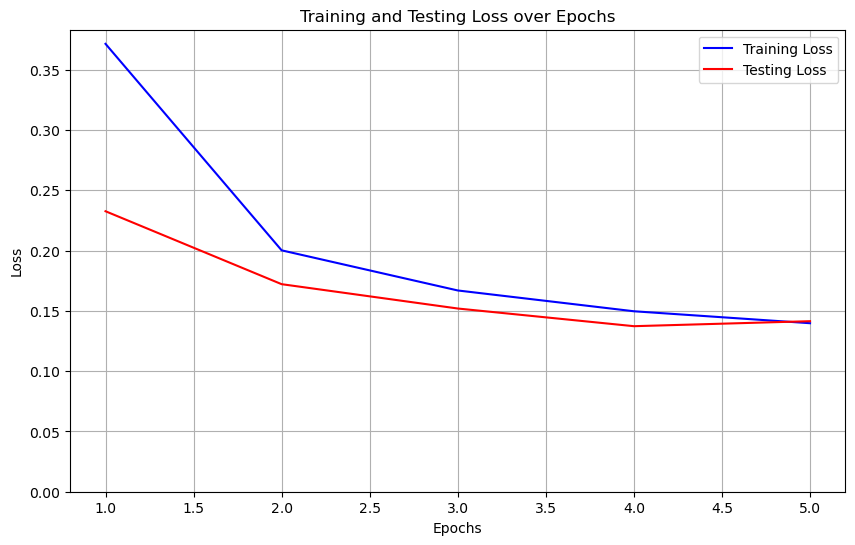

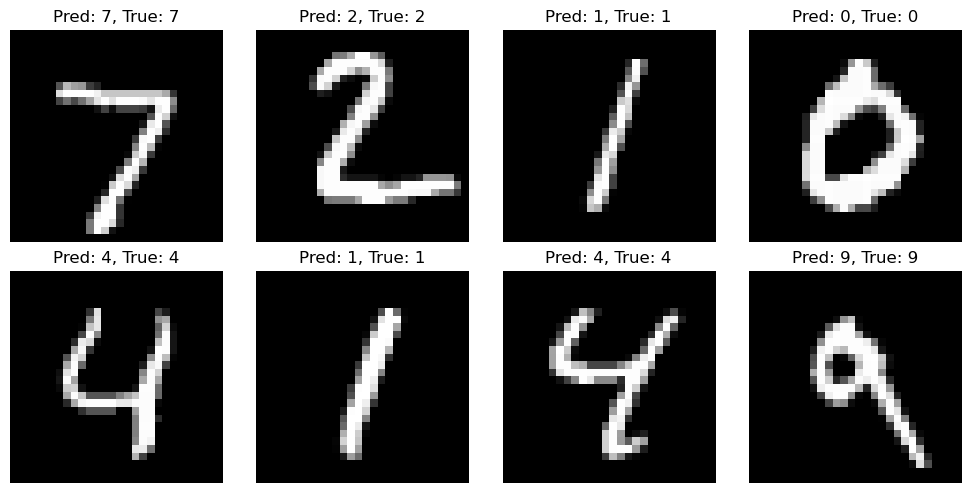

In [68]:
## Exp
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

epochs = 5

# Define your model, loss function, and optimizer
model = SimpleCNN_v1()
criterion = nn.CrossEntropyLoss()  # Or whatever loss function you're using
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store training and testing loss
train_losses = []
test_losses = []

# Number of epochs
epochs = 5  # Or any number you want

# Training loop
for epoch in range(epochs):
    model.train()
    running_train_loss = 0.0
    correct_train = 0
    total_train = 0
    
    # Training phase
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
    
    train_loss = running_train_loss / total_train  # Average loss for the training set
    train_losses.append(train_loss)
    
    # Validation phase
    model.eval()
    running_test_loss = 0.0
    correct_test = 0
    total_test = 0
    
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            running_test_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)
    
    test_loss = running_test_loss / total_test  # Average loss for the test set
    test_losses.append(test_loss)
    
    # Print epoch statistics
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# Plotting the training and testing loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, epochs + 1), test_losses, label='Testing Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss over Epochs')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)  # Set the y-axis to start at 0
plt.show()

# Evaluate model and display 8 predictions - I could probably clean this up some.
model.eval()
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
with torch.no_grad():
    images, labels = next(iter(testloader))
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    for i, ax in enumerate(axes.flat):
        img = images[i].cpu().numpy().squeeze()  # Convert to HxW format for grayscale images
        img = (img * 0.5) + 0.5  # Unnormalize

        ax.imshow(img, cmap="gray")
        ax.set_title(f"Pred: {predicted[i].item()}, True: {labels[i].item()}")
        ax.axis("off")

plt.tight_layout()
plt.show()

Epoch 1/5, Loss: 0.3543
Epoch 2/5, Loss: 0.1751
Epoch 3/5, Loss: 0.1451
Epoch 4/5, Loss: 0.1295
Epoch 5/5, Loss: 0.1181
Test Accuracy: 96.13%


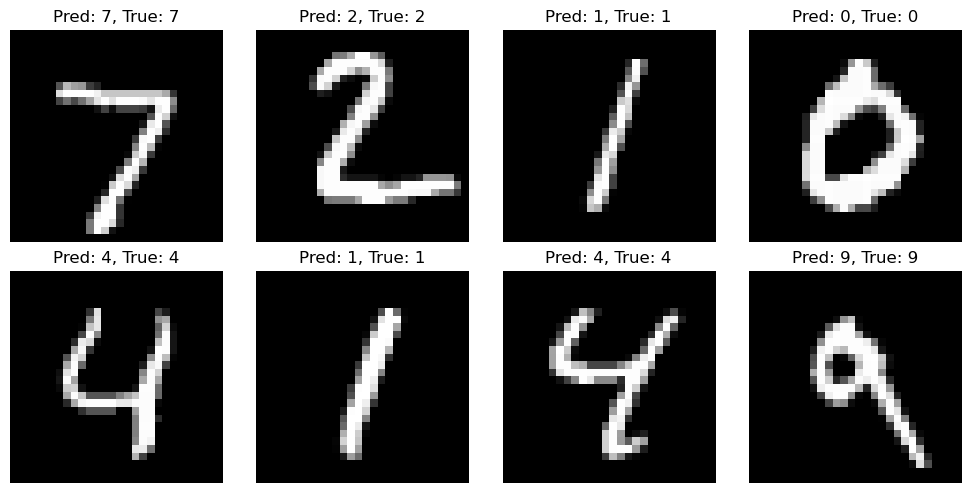

In [84]:
# REMOVE THIS DONT RUN IT IS REPLACE BY THE CLL ABOVE
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN_v1().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

#    print(f"Epoch {epoch}, Loss: {running_loss/len(train_loader):.4f}")
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(trainloader):.4f}")

# Evaluate on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Evaluate model and display 8 predictions - I could probably clean this up some.
model.eval()
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
with torch.no_grad():
    images, labels = next(iter(testloader))
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    for i, ax in enumerate(axes.flat):
        img = images[i].cpu().numpy().squeeze()  # Convert to HxW format for grayscale images
        img = (img * 0.5) + 0.5  # Unnormalize

        ax.imshow(img, cmap="gray")
        ax.set_title(f"Pred: {predicted[i].item()}, True: {labels[i].item()}")
        ax.axis("off")

plt.tight_layout()
plt.show()

### Improved Model 
In the first model, we use a simple CNN with only 2 kernels in the first convolutional layer, followed by max pooling and a fully connected layer. While this provides a basic understanding of CNNs, the model is quite limited in its capacity to extract features from the MNIST dataset.

To improve performance, we increase the number of kernels from 2 to 8 and introduce an activation function (ReLU). Additionally, we adjust the pooling layer's stride to 2, which helps downsample the feature maps more effectively. These changes allow the network to learn richer representations of the digits, leading to improved accuracy.

Now, let's implement the improved model:

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# So here is where set up the model architecture
# Define CNN using Sequential
class SimpleCNN_v2(nn.Module):
    def __init__(self):
        super(SimpleCNN_v2, self).__init__()
        self.model = nn.Sequential(
            # Conv Layer
            nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=0),  
             # Activation
            nn.ReLU(), 
            # Max Pooling
            nn.MaxPool2d(kernel_size=2, stride=2),  
            # Flatten before FC layer
            nn.Flatten(),  
            # Fully Connected Layer
            nn.Linear(8 * 13 * 13, 10)  
        )

    def forward(self, x):
        return self.model(x)


The nn.Sequential container stacks layers in order so that forward() just applies them sequentially.
Here is a breakdown of how each layer is handled:

##### Explanation of Key Parameters

| Parameter | Description |
|-----------|-------------|
| `in_channels=1` | Input has 1 channel (grayscale for MNIST). |
| `out_channels=8` | The convolution layer applies 8 filters, producing 8 output channels. |
| `kernel_size=3` | Each filter is a 3×3 matrix sliding over the image. |
| `stride=1` | The filter moves one pixel at a time. |
| `padding=0` | No extra pixels are added around the edges. |
| `MaxPool2d(kernel_size=2, stride=2)` | Reduces spatial dimensions by a factor of 2. |
| `Flatten()` | Converts 3D feature maps into a 1D vector before passing to `Linear()`. |
| `Linear(8 * 14 * 14, 10)` | Fully connected layer mapping 1D vector to 10 output classes. |

---

#####  Breakdown of Each Layer

| Layer | Operation | Input Shape | Output Shape |
|-------|------------|--------------|--------------|
| **Input** | Raw image | `(1, 28, 28)` | `(1, 28, 28)` |
| **Conv2D** | `8 filters, 3×3, stride=1, padding=0` | `(1, 28, 28)` | `(8, 26, 26)` |
| **ReLU** | Activation | `(8, 26, 26)` | `(8, 26, 26)` |
| **MaxPool2D** | `2×2, stride=2` | `(8, 26, 26)` | `(8, 13, 13)` |
| **Flatten** | Converts to 1D | `(8, 13, 13)` | `(1352,)` |
| **Linear** | Fully Connected Layer | `(1352,)` | `(10,)` |

##### Feature Map Size Calculations

Using the formula for Conv2D output size:

$$
\text{Output Size} = \frac{\text{Input Size} - \text{Kernel Size} + 2 \times \text{Padding}}{\text{Stride}} + 1
$$

Since `padding=0`, `kernel_size=3`, `stride=1`:

$$
\frac{28 - 3 + 2(0)}{1} + 1 = 26
$$

Thus, the output size after Conv2D is **`(8, 26, 26)`**.

---

##### After MaxPooling (`2×2, stride=2`):

$$
\frac{26 - 2}{2} + 1 = 13
$$

Thus, the output size after pooling is **`(8, 13, 13)`**.


##### Flattening

Since `(8, 13, 13)` results in:

$$
8 \times 13 \times 13 = 1352
$$

The fully connected layer input size is **1352**.



**ROOKIE MISTAKES:**

So it is important to understand how each of these calculations are done because the number of kernels in combination with the size of the kernel, as well as the padding and stride, will require a calculation that impacts and layers that follow. 


We have some logic up front hat will detect the presence (or not) of a GPU. This probably won't cause any problems on your system but if it does then comment it out.
We'll also pick some defaults for an optimizer and a loss function along with a modest number of epochs. Remember that an epoch is the process of handling all incoming data
(training or testing) in one loop. 

The DataLoaders I mentioned earlier will efficiently feed the data into the model which in turn will move the data to the CPU or GPU for processing. Then the optimizer will clear all existing gradients, get a rpediction from the model and then evlaute the loss associated with the prediction. Then there will be a backwards propogation step to recompute the weights. We keep track of the loss.

After the training is down we then use the model in **no_grad** mode to do some test predictions for accuracy.


<img src="./pics/layout.png">

Epoch 1/5, Train Loss: 0.3226, Test Loss: 0.1332
Epoch 2/5, Train Loss: 0.1203, Test Loss: 0.0931
Epoch 3/5, Train Loss: 0.0894, Test Loss: 0.0785
Epoch 4/5, Train Loss: 0.0744, Test Loss: 0.0701
Epoch 5/5, Train Loss: 0.0646, Test Loss: 0.0670


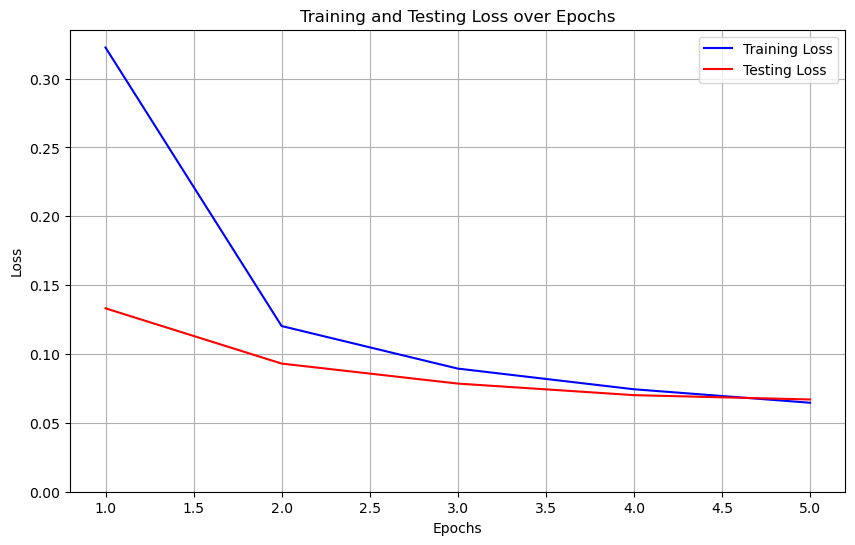

In [34]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

epochs = 5

# Define your model, loss function, and optimizer
model = SimpleCNN_v2()
criterion = nn.CrossEntropyLoss()  # Or whatever loss function you're using
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store training and testing loss
train_losses = []
test_losses = []

# Number of epochs
epochs = 5  # Or any number you want

# Training loop
for epoch in range(epochs):
    model.train()
    running_train_loss = 0.0
    correct_train = 0
    total_train = 0
    
    # Training phase
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
    
    train_loss = running_train_loss / total_train  # Average loss for the training set
    train_losses.append(train_loss)
    
    # Validation phase
    model.eval()
    running_test_loss = 0.0
    correct_test = 0
    total_test = 0
    
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            running_test_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)
    
    test_loss = running_test_loss / total_test  # Average loss for the test set
    test_losses.append(test_loss)
    
    # Print epoch statistics
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# Plotting the training and testing loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, epochs + 1), test_losses, label='Testing Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss over Epochs')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)  # Set the y-axis to start at 0
plt.show()


### Visualizing Feature Maps & Weights

#### Why Visualizing Feature Maps & Weights is Useful 

When training a Convolutional Neural Network (CNN), we often focus on performance metrics like accuracy and loss. However, understanding what the network *sees* at different layers can provide deeper insights into how it learns.  

#### Early Layer Filters 
- The first convolutional layer typically detects simple patterns such as edges, lines, and textures.  
- These filters act similarly to how our own visual system detects contrast and shapes in an image.  

#### Deeper Layer Feature Maps  
- As data moves through deeper layers, the network starts recognizing more complex patterns, such as parts of digits in MNIST or facial features in a more advanced model.  
- Instead of just edges, the later layers capture meaningful structures that help the model make accurate predictions.  

#### Why This Matters 
- **Debugging & Model Improvement:** If early layers aren’t detecting meaningful features, the model might not learn well.  
- **Understanding Model Decisions:** Helps explain why the model classifies images in a certain way, making deep learning less of a “black box.”  
- **Feature Engineering Insight:** Can inspire manual feature extraction techniques for other machine learning models.

Why Do Filters Produce Different Outputs?
Each of the out_channels filters (kernels) in a Conv2d layer has its own set of weights, which are initialized randomly and updated during training. Even though all filters are of the same size, they detect different features from the input.

Now, let’s visualize the feature maps from different layers of our CNN to see this process in action!


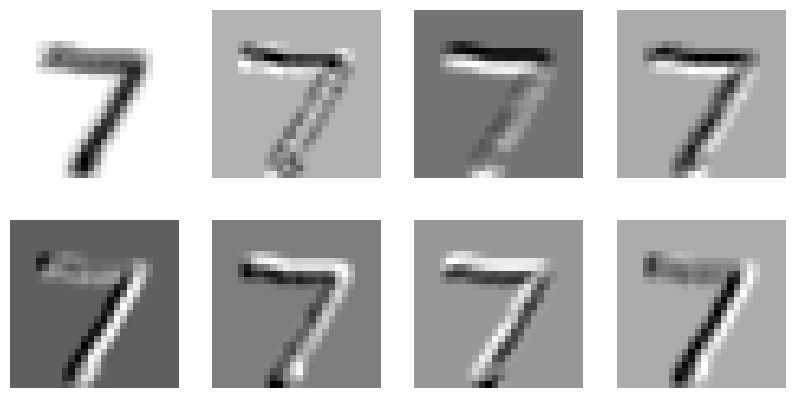

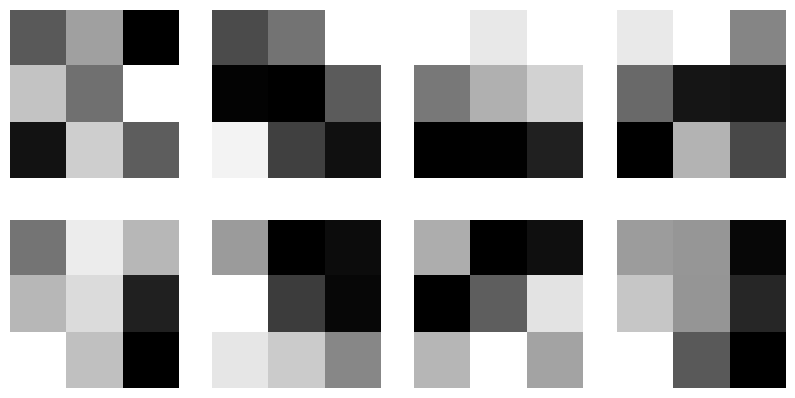

In [35]:
import torch
import matplotlib.pyplot as plt

def visualize_feature_maps_and_weights(model, testloader):
    """
    Visualizes the feature maps and weights after passing a sample through the model.
    
    Parameters:
    - model (nn.Module): The trained CNN model.
    - testloader (DataLoader): DataLoader containing test images for visualization.
    """
    # Get a batch of test data
    dataiter = iter(testloader)
    images, labels = next(dataiter)  # Correct way to get the next batch

    # Send model to the same device as the input data (e.g., GPU or CPU)
     # Set the model to evaluation mode
    model.eval() 

    # Get the first image in the batch
    images = images[0].unsqueeze(0)  

    # Pass the image through the model to get the feature maps
    with torch.no_grad():
        # First conv layer output
        output = model.model[0](images)  

    # Visualize feature maps (activations from the first Conv2D layer)
    fig, ax = plt.subplots(2, 4, figsize=(10, 5))
    ax = ax.ravel()
    
    # 8 feature maps from the first Conv2D layer
    for i in range(8):  
        ax[i].imshow(output[0, i].cpu(), cmap='gray')
        ax[i].axis('off')
    plt.show()

    # Visualize the learned filters (weights) from the first Conv2D layer
    # First Conv2D layer filters
    filters = model.model[0].weight.data  
    fig, ax = plt.subplots(2, 4, figsize=(10, 5))
    ax = ax.ravel()
    # Visualizing the 8 filters
    for i in range(8):  
        ax[i].imshow(filters[i, 0].cpu(), cmap='gray')
        ax[i].axis('off')
    plt.show()

# Call the function after training the model
visualize_feature_maps_and_weights(model, testloader)


#### Understanding the Feature Map Visualizations

##### 1. First Layer Feature Maps
- These show how the network detects basic patterns like edges, textures, and simple gradients.
- Filters in the first layer act like edge detectors, responding strongly to changes in pixel intensity.

##### 2. Deeper Layer Feature Maps
- As the image moves through the network, the activations become more abstract.
- Instead of detecting simple edges, the model now recognizes more complex patterns such as curves or digit parts.
- Some filters might activate strongly for a specific digit shape, while others may ignore irrelevant details.

##### 3. Why Some Feature Maps Appear Dark or Blank
- If a feature map looks completely black or uniform, it means that particular filter did not activate strongly for the given input.
- This is normal! Some filters respond only to specific patterns, and if the input lacks that pattern, the filter remains inactive.

##### 4. Interpretation of Different Activation Strengths
- Bright/High-contrast areas: The network is focusing on these regions as important features.
- Dark/Low-contrast areas: These areas contribute less to the network’s decision-making.

##### 5. How This Helps Us Understand CNNs
- If early layers aren’t detecting meaningful edges, the model might not learn well.
- If deeper layers fail to capture distinct features, the network might struggle with classification.
- By analyzing feature maps, we can diagnose whether the CNN is learning useful representations or just memorizing noise.



So the performance of our first CNN wasn't bad at all and we were able to improve it with a slightly more involved model by using more filters. What else could we try here? Maybe we can see if chagning optimizers changes anything significantly. Let's set up a new block of code to do this.

### Trying Different Optimizers

Here we will try three different optimizers. It's not hard to do though we will create a function to do the training and capture accuracies from each optimizer we try and then plot it.

#### What to Observe?

| Optimizer  | Expected Behavior | Key Observations |
|------------|------------------|------------------|
| **SGD** (Stochastic Gradient Descent) | Can be slower to converge but may generalize better. May need momentum to speed up training. | Test accuracy is **similar** to Adam and RMSprop, suggesting the dataset/model is not highly sensitive to optimizer choice. |
| **Adam** (Adaptive Moment Estimation) | Typically converges faster due to adaptive learning rates. Works well with sparse data. | Despite faster updates, it does **not significantly outperform** the others, indicating that adaptive learning may not provide much extra benefit in this case. |
| **RMSprop** (Root Mean Square Propagation) | Good for non-stationary problems and effective in training deep networks. Balances fast convergence and stable updates. | Performance is similar to both SGD and Adam, suggesting that the dataset’s characteristics do not require the extra adaptiveness of RMSprop. |

**Key Takeaways:**  
- **Optimizer Choice Is Not Always Critical**: If all three optimizers yield similar test accuracies, it means the model and dataset are not particularly sensitive to optimizer choice.  
- **Try More Challenging Data**: On more complex datasets (e.g., **CIFAR-10, ImageNet**), the differences between optimizers often become more noticeable.  
- **Consider Training Time**: While test accuracy is similar, Adam and RMSprop might have reached the accuracy level faster than vanilla SGD.   
- **Hyperparameter Tuning Still Matters**: If there were **no learning rate adjustments**, a different learning rate for SGD might have improved its performance.

Before we try our experiment with different optimziers let's create a function that handles the loading of the MNIST data. This will help us later by providing a standard and uniform way to get the data and transform it for use with our models. This is not required per se but it helps.

In [36]:
import torchvision
import torchvision.transforms as transforms
import torch

def load_mnist_data(batch_size=64, transform=None):
    """
    Function to load the MNIST dataset and return train and test DataLoader objects.
    
    Parameters:
    - batch_size (int): Number of samples per batch.
    - transform (torchvision.transforms.Compose or None): Transformations to apply to the data.
    
    Returns:
    - trainloader: DataLoader for training data.
    - testloader: DataLoader for testing data.
    """
    # Apply default transformations if not provided
    if transform is None:
        transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

    # Load training and test datasets
    trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    # Create DataLoader for training and testing
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)
    
    return trainloader, testloader


Epoch 1/5, Training Loss: 0.2705
Epoch 2/5, Training Loss: 0.1141
Epoch 3/5, Training Loss: 0.0899
Epoch 4/5, Training Loss: 0.0788
Epoch 5/5, Training Loss: 0.0698
Test Accuracy with SGD: 97.73%

Epoch 1/5, Training Loss: 0.1558
Epoch 2/5, Training Loss: 0.0796
Epoch 3/5, Training Loss: 0.0653
Epoch 4/5, Training Loss: 0.0562
Epoch 5/5, Training Loss: 0.0494
Test Accuracy with Adam: 98.15%

Epoch 1/5, Training Loss: 0.1775
Epoch 2/5, Training Loss: 0.0801
Epoch 3/5, Training Loss: 0.0647
Epoch 4/5, Training Loss: 0.0567
Epoch 5/5, Training Loss: 0.0527
Test Accuracy with RMSprop: 98.06%



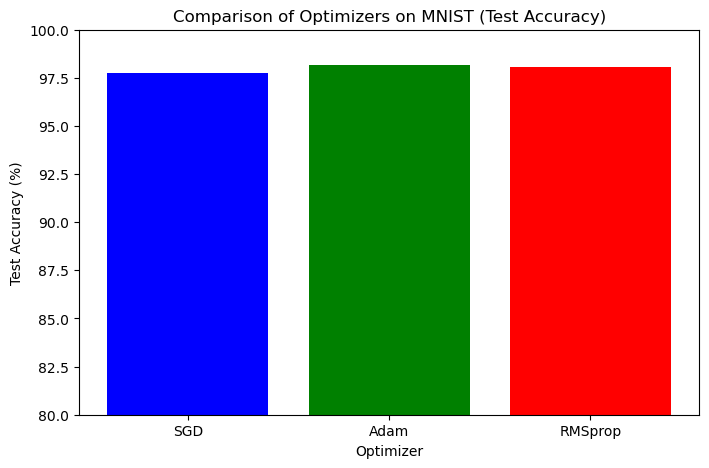

In [37]:
# Okay we import stuff repeatedly so the example is reproducible
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# So here is where set up the model architecture
# Define CNN using Sequential
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=0),  # Conv Layer
            nn.ReLU(),  # Activation
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max Pooling
            nn.Flatten(),  # Flatten before FC layer
            nn.Linear(8 * 13 * 13, 10)  # Fully Connected Layer
        )

    def forward(self, x):
        return self.model(x)


# So since we are gonna run the training loop three times let's make a function to do that.
# We are trying out 3 different optimziers so it makes sense to use a function for training
# for each of the optimizers

def train_model(optimizer_type="SGD", num_epochs=5, learning_rate=0.01):
    
    # Load MNIST dataset
    trainloader, testloader = load_mnist_data(batch_size=64)
   
    # Initialize model - this is just initializing it. Note that we want to reinitialize the model for each
    # different optimizer because if we didn't the results of the previous training would carry over. BAD!
    model = SimpleCNN()

    # Our default optimzier is here
    criterion = nn.CrossEntropyLoss()

    # Select optimizer - This logic looks at the "optimzer_type" argument to do the work
    if optimizer_type == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    elif optimizer_type == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer_type == "RMSprop":
        optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)
    else:
        raise ValueError("Unsupported optimizer. Choose from 'SGD', 'Adam', or 'RMSprop'.")

    # Training loop
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in trainloader:
            optimizer.zero_grad()  # Zero out gradients
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {running_loss / len(trainloader):.4f}")

    # Evaluate model on test data - check training data
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = 100 * correct / total
    print(f"Test Accuracy with {optimizer_type}: {test_accuracy:.2f}%\n")
    
    return test_accuracy

# Store results
optimizers = ["SGD", "Adam", "RMSprop"]
test_accuracies = {}

# Run training for each optimizer and collect test accuracies
for opt in optimizers:
    test_accuracies[opt] = train_model(optimizer_type=opt)

# Plot results
plt.figure(figsize=(8, 5))
plt.bar(test_accuracies.keys(), test_accuracies.values(), color=['blue', 'green', 'red'])
plt.xlabel("Optimizer")
plt.ylabel("Test Accuracy (%)")
plt.title("Comparison of Optimizers on MNIST (Test Accuracy)")
plt.ylim(80, 100)  # Set y-axis limits for better visualization
plt.show()


### Try Different Activation Functions

We could experiments with different activation functions which are separate from optimizers. Let's review. Activation functions are used in neural networks to introduce non-linearity, enabling the model to learn complex patterns and representations from data. They transform the input signals from one layer to the next, determining how much influence each neuron should have on the final output.

Without activation functions, a neural network would essentially behave like a linear model, incapable of capturing intricate relationships within the data. Different activation functions, such as ReLU, Sigmoid, and Tanh, offer distinct characteristics that affect the training process, the flow of gradients, and the expressiveness of the network, making them essential for improving the performance and accuracy of deep learning models.

| Activation Function | Activation Map Behavior | Potential Issues |
|--------------------|----------------------|-----------------|
| **ReLU** (Rectified Linear Unit) | Sets negative values to zero, allowing sparse activation and better gradient flow. | Can suffer from **"dying ReLU"** where neurons get stuck at zero. |
| **Sigmoid** | Compresses outputs into the range (0,1), useful for probability-like outputs. | Can cause **vanishing gradients**, slowing learning in deep networks. |
| **Tanh** | Outputs range from (-1,1), leading to a centered activation map. | Still suffers from **vanishing gradients**, but less than Sigmoid. |


Training with ReLU activation function
Epoch [1/5], Loss: 0.3520, Accuracy: 0.9039
Epoch [2/5], Loss: 0.0406, Accuracy: 0.9647
Epoch [3/5], Loss: 0.0224, Accuracy: 0.9746
Epoch [4/5], Loss: 0.1813, Accuracy: 0.9782
Epoch [5/5], Loss: 0.0572, Accuracy: 0.9809
Test Accuracy: 0.9767

Training with Sigmoid activation function
Epoch [1/5], Loss: 0.2820, Accuracy: 0.8240
Epoch [2/5], Loss: 0.3862, Accuracy: 0.9061
Epoch [3/5], Loss: 0.1855, Accuracy: 0.9166
Epoch [4/5], Loss: 0.2904, Accuracy: 0.9223
Epoch [5/5], Loss: 0.1673, Accuracy: 0.9268
Test Accuracy: 0.9269

Training with Tanh activation function
Epoch [1/5], Loss: 0.0531, Accuracy: 0.8955
Epoch [2/5], Loss: 0.2714, Accuracy: 0.9423
Epoch [3/5], Loss: 0.0279, Accuracy: 0.9560
Epoch [4/5], Loss: 0.0839, Accuracy: 0.9639
Epoch [5/5], Loss: 0.1599, Accuracy: 0.9697
Test Accuracy: 0.9695



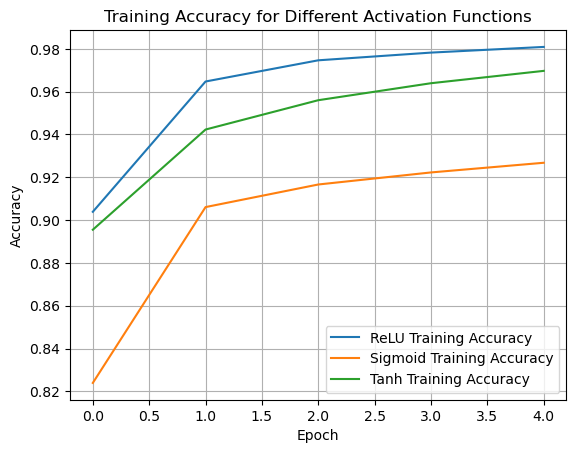

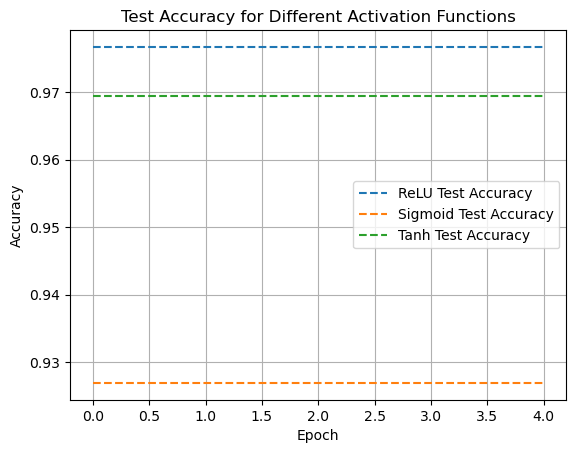

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define CNN using Sequential with a parameter for the activation function
class SimpleCNN(nn.Module):
    def __init__(self, activation_function='ReLU'):
        super(SimpleCNN, self).__init__()
        
        # Select activation function
        if activation_function == 'ReLU':
            self.activation = nn.ReLU()
        elif activation_function == 'Sigmoid':
            self.activation = nn.Sigmoid()
        elif activation_function == 'Tanh':
            self.activation = nn.Tanh()
        else:
            raise ValueError("Unsupported activation function")
        
        self.model = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=0),  # Conv Layer
            self.activation,  # Activation
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max Pooling
            nn.Flatten(),  # Flatten before FC layer
            nn.Linear(8 * 13 * 13, 10)  # Fully Connected Layer
        )

    def forward(self, x):
        return self.model(x)

# Training function
def train_model(model, trainloader, criterion, optimizer, epochs=1):
    train_accs = []
    for epoch in range(epochs):
        model.train()  # Set the model to training mode
        correct = 0
        total = 0
        for inputs, labels in trainloader:
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(inputs)  # Forward pass
            _, predicted = torch.max(outputs, 1)  # Get the predictions
            total += labels.size(0)
            correct += (predicted == labels).sum().item()  # Count correct predictions

            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize the weights

        train_accuracy = correct / total  # Calculate accuracy
        train_accs.append(train_accuracy)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {train_accuracy:.4f}")

    return train_accs

# Test function
def test_model(model, testloader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # No need to compute gradients during testing
        for inputs, labels in testloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total  # Calculate accuracy
    print(f"Test Accuracy: {accuracy:.4f}\n")
    return accuracy

# Load MNIST dataset
trainloader, testloader = load_mnist_data(batch_size=64)
      

# Initialize model, criterion, and optimizer for each activation function
activation_functions = ['ReLU', 'Sigmoid', 'Tanh']
train_accs_dict = {}
test_accs_dict = {}

# What fun - Time to process a loop for each of the activation functions
for activation_function in activation_functions:
    print(f"Training with {activation_function} activation function")
    
    model = SimpleCNN(activation_function=activation_function)
    criterion = nn.CrossEntropyLoss()  # Using Cross Entropy Loss for classification
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer
    
    # Train the model
    train_accs = train_model(model, trainloader, criterion, optimizer, epochs=5)
    train_accs_dict[activation_function] = train_accs

    # Test the model
    test_accuracy = test_model(model, testloader)
    test_accs_dict[activation_function] = test_accuracy

# Plot training accuracies for all activation functions
for activation_function in activation_functions:
    plt.plot(train_accs_dict[activation_function], label=f'{activation_function} Training Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy for Different Activation Functions')
plt.legend()
plt.grid()
plt.show()

# Plot test accuracies for all activation functions
for activation_function in activation_functions:
    plt.plot([test_accs_dict[activation_function]] * 5, label=f'{activation_function} Test Accuracy', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy for Different Activation Functions')
plt.legend()
plt.grid()
plt.show()


### Batch Normalization


Batch Normalization (BN) is a technique introduced by **Ioffe & Szegedy (2015)** to **mitigate internal covariate shift**—a problem where the distribution of inputs to each layer in a neural network changes during training. By normalizing the activations within a mini-batch, BN ensures that each layer receives inputs with a consistent distribution, allowing for more stable and efficient learning.

#### How Batch Normalization Works
In practice, BN computes the **mean** and **variance** of activations for each mini-batch and then normalizes the activations:

$$
\hat{x} = \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}}
$$

where:  
- $x$ is the activation value,  
- $\mu$ is the batch mean,  
- $\sigma^2$ is the batch variance, and  
- $\epsilon$ is a small constant added for numerical stability.  

After normalization, the activations are **scaled and shifted** using learnable parameters \( \gamma \) and \( \beta \):

$$
y = \gamma \hat{x} + \beta
$$

These **learnable parameters** allow the model to recover the original distribution if necessary, ensuring that normalization does not limit the representational power of the network.



#### Key Benefits of Batch Normalization

| Benefit | Explanation |
|---------|------------|
| **Speeds up training** | Reduces sensitivity to weight initialization and enables higher learning rates. |
| **Acts as an implicit regularizer** | Introduces slight noise, reducing overfitting. |
| **Improves gradient flow** | Keeps activations within a stable range, reducing vanishing or exploding gradients. |
| **Reduces hyperparameter tuning** | Less reliance on careful selection of learning rates and weight initialization. |

#### Potential Downsides of Batch Normalization

| Downside | Explanation |
|----------|------------|
| **Computational Overhead** | Requires extra computation for mean/variance calculations and storage for parameters. |
| **Inefficiency in Small Batches** | Small batch sizes (<8) can lead to unstable mean/variance estimates. |
| **Not Ideal for Certain Architectures** | Less effective for RNNs or architectures with small batch sizes; alternatives like Layer Norm or Group Norm may be better. |


In [39]:
import torch
import torch.nn as nn

import torch
import torch.nn as nn

# Define CNN using Sequential with Batch Normalization
class SimpleCNN_Batch(nn.Module):
    def __init__(self):
        super(SimpleCNN_Batch, self).__init__()
        self.model = nn.Sequential(
            # Conv Layer with 4 kernels
            nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=0),  
             # Batch Normalization after Conv Layer
            nn.BatchNorm2d(4),
            # Activation
            nn.ReLU(), 
            # Max Pooling
            nn.MaxPool2d(kernel_size=2, stride=2),  
            # Flatten before FC layer
            nn.Flatten(),  
            # Fully Connected Layer
            nn.Linear(4 * 13 * 13, 10)  # Adjusted to match the output size after Conv2d and MaxPool
        )

    def forward(self, x):
        return self.model(x)

# Example usage
model = SimpleCNN_Batch()
print(model)


SimpleCNN_Batch(
  (model): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=676, out_features=10, bias=True)
  )
)


Epoch 1/10, Train Loss: 0.2927, Test Loss: 0.1438
Epoch 2/10, Train Loss: 0.1261, Test Loss: 0.1077
Epoch 3/10, Train Loss: 0.0973, Test Loss: 0.0872
Epoch 4/10, Train Loss: 0.0846, Test Loss: 0.0847
Epoch 5/10, Train Loss: 0.0756, Test Loss: 0.0760
Epoch 6/10, Train Loss: 0.0711, Test Loss: 0.0945
Epoch 7/10, Train Loss: 0.0662, Test Loss: 0.0830
Epoch 8/10, Train Loss: 0.0633, Test Loss: 0.0705
Epoch 9/10, Train Loss: 0.0601, Test Loss: 0.0758
Epoch 10/10, Train Loss: 0.0573, Test Loss: 0.0843


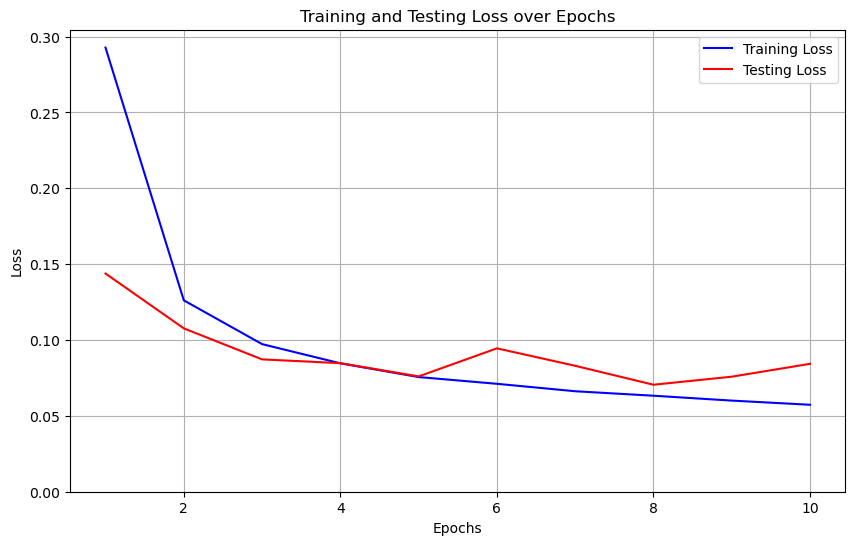

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

epochs = 30

# Define your model, loss function, and optimizer
model = SimpleCNN_Batch()
criterion = nn.CrossEntropyLoss()  # Or whatever loss function you're using
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store training and testing loss
train_losses = []
test_losses = []

# Number of epochs
epochs = 10  # Or any number you want

# Training loop
for epoch in range(epochs):
    model.train()
    running_train_loss = 0.0
    correct_train = 0
    total_train = 0
    
    # Training phase
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
    
    train_loss = running_train_loss / total_train  # Average loss for the training set
    train_losses.append(train_loss)
    
    # Validation phase
    model.eval()
    running_test_loss = 0.0
    correct_test = 0
    total_test = 0
    
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            running_test_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)
    
    test_loss = running_test_loss / total_test  # Average loss for the test set
    test_losses.append(test_loss)
    
    # Print epoch statistics
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# Plotting the training and testing loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, epochs + 1), test_losses, label='Testing Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss over Epochs')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)  # Set the y-axis to start at 0
plt.show()


homework


Epoch 1, Loss: 0.5520122191513271
Epoch 2, Loss: 0.3375907759152369
Epoch 3, Loss: 0.29415614015734526
Epoch 4, Loss: 0.2800497192897395
Epoch 5, Loss: 0.26857186675961336


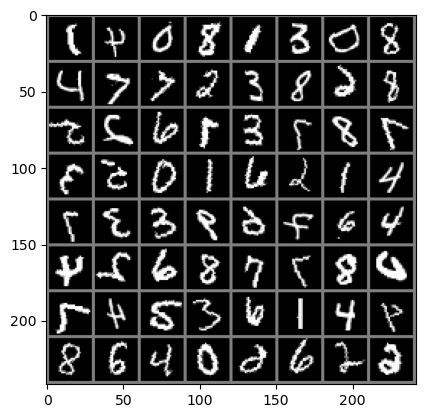

In [62]:
import torch
from torch import nn, optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# Define the data augmentation transformations (only rotation and flipping)
transform = transforms.Compose([
    transforms.RandomRotation(20),               # Rotate the image by a random angle (-20 to 20 degrees)
    transforms.RandomHorizontalFlip(),            # Randomly flip the image horizontally
    transforms.ToTensor(),                        # Convert image to tensor
    transforms.Normalize((0.5,), (0.5,))          # Normalize the image to [0, 1]
])

# Load MNIST dataset with data augmentation applied
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=0)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

        # We calculate the output size dynamically based on the input size.
        # For MNIST, the input size is (1, 28, 28), so after the convolution and pooling:
        self.fc1 = nn.Linear(8 * 13 * 13, 10)  # Corrected the number of features after convolution

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool(x)
        x = x.view(-1, 8 * 13 * 13)  # Flatten the tensor for the fully connected layer
        x = self.fc1(x)
        return x

# Instantiate the model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop (simplified)
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}")

# Visualize a batch of augmented images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training data using a loop
dataiter = iter(trainloader)
images, labels = next(dataiter)  # Fetch a batch correctly

# Show images
imshow(torchvision.utils.make_grid(images))


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 1. Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# 2. Load Pretrained ResNet Model
model = models.resnet18(pretrained=True)

# 3. Modify the First Layer to Accept 1 Channel (Grayscale)
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

# 4. Modify the Final Layer for MNIST (10 classes)
model.fc = nn.Linear(model.fc.in_features, 10)

# 5. Freeze Early Layers
for param in model.parameters():
    param.requires_grad = False

# Only train the final fully connected layer
for param in model.fc.parameters():
    param.requires_grad = True

# 6. Set up the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

# 7. Training the Model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(trainloader)
    epoch_acc = 100 * correct / total
    print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

# 8. Evaluate the Model
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_acc = 100 * correct / total
print(f'Test Accuracy: {test_acc:.2f}%')


Epoch 1, Loss: 1.3885, Accuracy: 53.25%
Epoch 2, Loss: 1.2306, Accuracy: 58.68%
Epoch 3, Loss: 1.2095, Accuracy: 59.40%
Epoch 4, Loss: 1.1988, Accuracy: 59.71%


In [39]:
import torch
import torch.nn as nn

class SimpleCNN_v3(nn.Module):
    def __init__(self):
        super(SimpleCNN_v3, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=0),  
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.flatten = nn.Flatten()
        self.fc = None  # Placeholder; will be initialized dynamically

    def forward(self, x):
        x = self.conv_layers(x)
        if self.fc is None:
            # Dynamically determine the number of input features
            num_features = x.shape[1] * x.shape[2] * x.shape[3]
            self.fc = nn.Linear(num_features, 10).to(x.device)  # Create FC layer dynamically

        x = self.flatten(x)
        x = self.fc(x)  # Apply FC layer
        return x

# Test with a dummy input
dummy_input = torch.randn(1, 1, 28, 28)  # Batch of 1, grayscale image of 28x28
model = SimpleCNN_v3()
output = model(dummy_input)
print("Output shape:", output.shape)  # Expected: (1, 10)


Output shape: torch.Size([1, 10])


In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Assuming you have a DataLoader for your training and testing sets
# train_loader and test_loader

# Define your model, loss function, and optimizer
model = SimpleCNN_v2()
criterion = nn.CrossEntropyLoss()  # Or whatever loss function you're using
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store training and testing loss
train_losses = []
test_losses = []

# Number of epochs
epochs = 10  # Or any number you want

# Training loop
for epoch in range(epochs):
    model.train()
    running_train_loss = 0.0
    correct_train = 0
    total_train = 0
    
    # Training phase
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
    
    train_loss = running_train_loss / total_train  # Average loss for the training set
    train_losses.append(train_loss)
    
    # Validation phase
    model.eval()
    running_test_loss = 0.0
    correct_test = 0
    total_test = 0
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            running_test_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)
    
    test_loss = running_test_loss / total_test  # Average loss for the test set
    test_losses.append(test_loss)
    
    # Print epoch statistics
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# Plotting the training and testing loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, epochs + 1), test_losses, label='Testing Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'train_loader' is not defined